## Taiwan Credit Card Default Dataset

Dataset link

This dataset provides 23 features used to predict whether Taiwanese customers will default on their credit card payments. The data was collected from April to September 2005, covering monthly repayment records.

Feature Description:

Limit Bal: Credit limit granted (including individual and family credit).

Sex: 1 = Male; 2 = Female.

EDUCATION: Level of education (1 = Graduate school; 2 = University; 3 = High school; 4 = Others).

MARRIAGE: Marital status (1 = Married; 2 = Single; 3 = Others).

AGE: Age.

PAY_0 ~ PAY_6: Repayment status in the past six months. -1 means on-time payment, 1 means payment delayed by one month, and so on.

BILL_AMT1 ~ BILL_AMT6: Bill statement amount (in NT dollars) from April to September 2005.

PAY_AMT1 ~ PAY_AMT6: Actual payment amount (in NT dollars) from April to September 2005.

default payment next month: Default indicator. 1 = Default; 0 = Not default.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("default_of_credit_card_clients.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
df.shape

(30000, 25)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.duplicated().sum() #no duplicated data

np.int64(0)

In [5]:
# check unique values
columns_to_check = ["SEX","EDUCATION","MARRIAGE","default payment next month"]

for col in columns_to_check:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in SEX: [2 1]
Unique values in EDUCATION: [2 1 3 5 4 6 0]
Unique values in MARRIAGE: [1 2 3 0]
Unique values in default payment next month: [1 0]


In [6]:
# remove data which are unknown information
df = df[df["EDUCATION"].isin([1,2,3,4])]

df = df[df["MARRIAGE"].isin([1,2,3])]

print(f'Remaining data rows {df.shape[0]}')

Remaining data rows 29601


In [7]:
#remove BILL_AMT and PAY_AMT columns
columns_to_drop = [col for col in df.columns if col.startswith("BILL_AMT") or col.startswith("PAY_AMT")]
columns_to_drop

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [8]:
df = df.drop(columns=columns_to_drop)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,0


In [9]:
#check unique values in PAY_ columns
columns_to_check = [col for col in df.columns if col.startswith("PAY_")]
for col in columns_to_check:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
Unique values in PAY_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
Unique values in PAY_3: [-1  0  2 -2  3  4  6  7  1  5  8]
Unique values in PAY_4: [-1  0 -2  2  3  4  5  7  6  1  8]
Unique values in PAY_5: [-2  0 -1  2  3  5  4  7  8  6]
Unique values in PAY_6: [-2  2  0 -1  3  6  4  7  8  5]


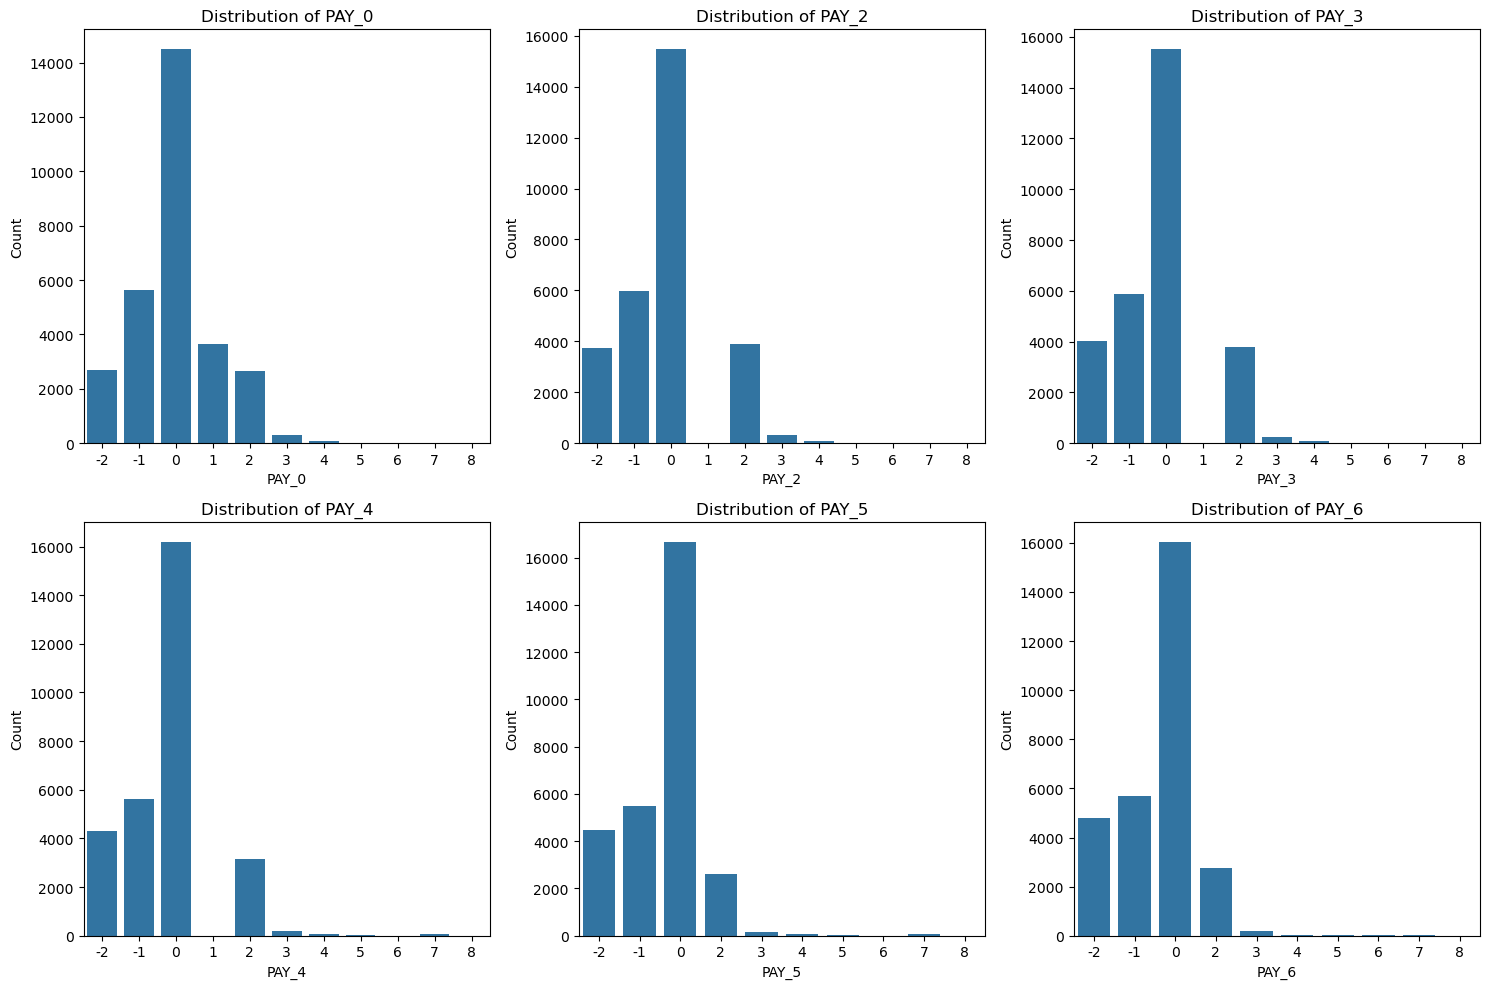

In [10]:
fig, axes = plt.subplots(2,3, figsize=(15, 10))
for i, col in enumerate(columns_to_check):
    row = i // 3
    col_index = i % 3
    ax = axes[row, col_index]
    sns.countplot(x = col, data = df, ax = ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

In [11]:
# Make a new column which sum all of PAY_ columns
# the greater the number is, the worse credits are 
df["PAY_SUM"] = df[[col for col in df.columns if col.startswith("PAY_")]].sum(axis=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month,PAY_SUM
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,-2
1,2,120000,2,2,2,26,-1,2,0,0,0,2,1,3
2,3,90000,2,2,2,34,0,0,0,0,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,0,-2


In [12]:
# drop PAY_ columns except for PAY_SUM
columns_to_drop = [col for col in df.columns if col.startswith("PAY_") and col != "PAY_SUM"]
df = df.drop(columns = columns_to_drop)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,PAY_SUM
0,1,20000,2,2,1,24,1,-2
1,2,120000,2,2,2,26,1,3
2,3,90000,2,2,2,34,0,0
3,4,50000,2,2,1,37,0,0
4,5,50000,1,2,1,57,0,-2


In [13]:
# Remove ID and do One-hot encoding to SEX, MERRIAGE(because they should not be ordinal)
df = df.drop(columns=["ID"])
df = pd.get_dummies(df, columns=["SEX", "MARRIAGE"]).astype(int)
df.head()

,LIMIT_BAL,EDUCATION,AGE,default payment next month,PAY_SUM,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,1,-2,0,1,1,0,0
1,120000,2,26,1,3,0,1,0,1,0
2,90000,2,34,0,0,0,1,0,1,0
3,50000,2,37,0,0,0,1,1,0,0
4,50000,2,57,0,-2,1,0,1,0,0


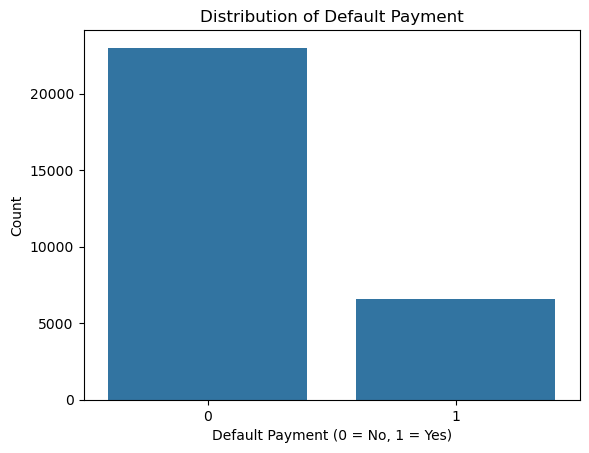

In [14]:
# check if there is class imblance
sns.countplot(x="default payment next month", data = df)
plt.title("Distribution of Default Payment")
plt.xlabel("Default Payment (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
# class imblance (yes), be careful when train model

## Model Training

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

X = df.drop(columns="default payment next month")
y = df["default payment next month"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )


In [16]:
X_train.shape

(23680, 9)

In [17]:
X_test.shape

(5921, 9)

In [18]:
# Train the Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.7964527027027027

In [19]:
model.score(X_test, y_test)

0.7914203681810505

[[18062   343]
 [ 4477   798]]


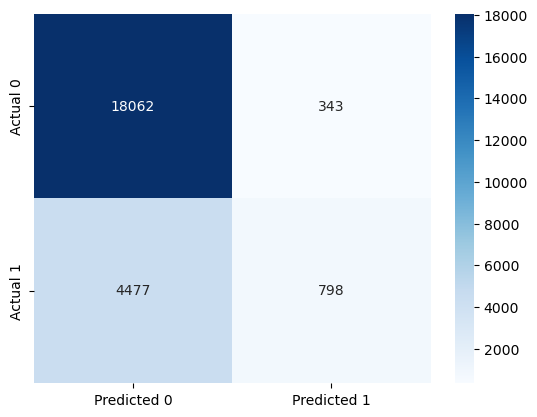

In [20]:
# 1.class imblance
# 2.confusion matrix, recall, precision
from sklearn.metrics import confusion_matrix, precision_score
y_train_pred = model.predict(X_train)
# confusion_matrix means the difference between actual value and predicted value
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
sns.heatmap(
    cm_train, annot=True, cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    fmt="d"
)
plt.show()

In [21]:
print(f"Recall score: {797/(797+4478)}")

Recall score: 0.15109004739336493


In [22]:
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("Recall on Training set:", recall_train)
print("Precision on Training set:", precision_train)

Recall on Training set: 0.15127962085308058
Precision on Training set: 0.6993865030674846


[[4503   88]
 [1147  183]]


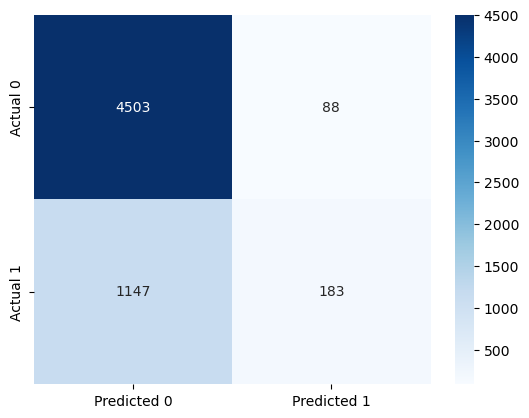

In [23]:
y_test_pred = model.predict(X_test)

cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
sns.heatmap(
    cm_test, annot=True, cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    fmt="d"
)
plt.show()

In [24]:
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
print("Recall on Test set:", recall_test)
print("Precision on Test set:", precision_test)

Recall on Test set: 0.13759398496240602
Precision on Test set: 0.6752767527675276


In [25]:
# Becasue of CLass imblance, the metrics  don't perform well on training set and test set
# solution: do undersampling on the less class
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)
# class are equal now
y_resampled.value_counts()


default payment next month
0    5275
1    5275
Name: count, dtype: int64

[[12063  6342]
 [ 1970  3305]]


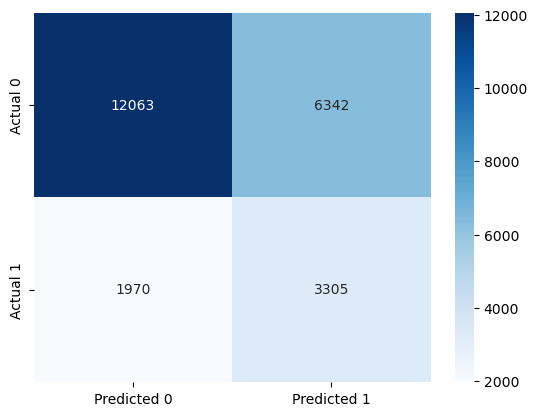

In [26]:
model = LogisticRegression(max_iter=1000)
# use resampled data to train model
model.fit(X_resampled, y_resampled)
y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
sns.heatmap(
    cm_train, annot=True, cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    fmt="d"
)
plt.show()


In [27]:
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("Recall on Training set:", recall_train)
print("Precision on Training set:", precision_train)

Recall on Training set: 0.6265402843601896
Precision on Training set: 0.34259355239970973


In [28]:
model.score(X_train, y_train)

0.6489864864864865

In [29]:
model.score(X_test, y_test)

0.6512413443675055

In [30]:
# Using the class_weight parameter from Sklearn Losgistic Regression model
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6403293918918919

[[11830  6575]
 [ 1942  3333]]


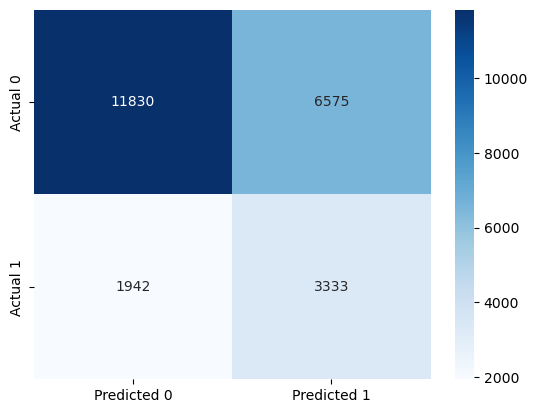

In [31]:
y_train_pred = model.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print(cm_train)
sns.heatmap(
    cm_train, annot=True, cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    fmt="d"
)
plt.show()

In [32]:
recall_train = recall_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
print("Recall on Training set:", recall_train)
print("Precision on Training set:", precision_train)

Recall on Training set: 0.6318483412322274
Precision on Training set: 0.3363948324586193


[[2941 1650]
 [ 477  853]]


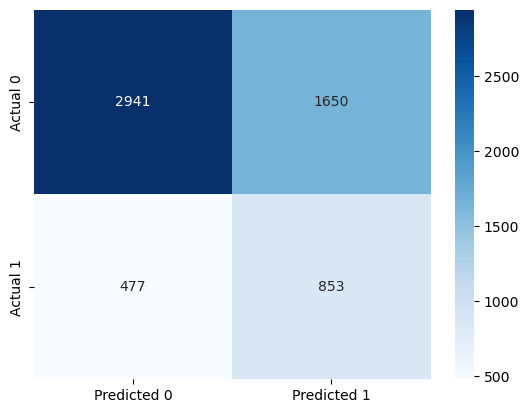

Recall on Test set: 0.6413533834586466
Precision on Test set: 0.3407910507391131


In [33]:
y_test_pred = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
sns.heatmap(
    cm_test, annot=True, cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    fmt="d"
)
plt.show()
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
print("Recall on Test set:", recall_test)
print("Precision on Test set:", precision_test)

## Conclusion

In this project, we applied **Logistic Regression** to predict whether a customer will default on their credit card payment using the **Taiwan Credit Card Default Payment** dataset.

### 1. Data Preprocessing and Exploration  
We began by performing **exploratory data analysis (EDA)** to understand the distribution of features and the target variable.  
Some categorical features were converted using **one-hot encoding** to make them suitable for model training.

### 2. Initial Model Training  
We first trained a Logistic Regression model on the original dataset.  
Although the model achieved **high accuracy**, the **recall score for the minority class (defaults)** was **very low**, indicating poor performance in detecting actual defaulters.  
This revealed that the model was biased toward the majority class due to the **class imbalance** in the dataset.

### 3. Handling Class Imbalance  
To address this issue, we applied **undersampling** to balance the class distribution.  
After retraining the model on the undersampled dataset, the evaluation metrics—especially **recall** and **F1-score**—showed significant improvement.

---

### 🔍 Summary

- Class imbalance can severely affect model performance, especially in tasks where identifying the minority class (e.g., defaulters) is important.
- Logistic Regression, when combined with proper preprocessing and imbalance handling, can serve as a strong baseline for classification tasks.
- **Recall is a more important metric than accuracy** in this context, since we care about correctly identifying potential default cases.

> Therefore, it is crucial to always evaluate both accuracy and recall when working with imbalanced classification datasets.